<a href="https://colab.research.google.com/github/Alejandro3009/ADA-Informes/blob/main/MergeSort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Merge Sort**

#1. Descripción del problema

Tenemos un arreglo de tamaño 8, el cual lo queremos ordenar de menor a mayor.

Entrada: una secuencia de números $[a_1,a_2,a_3,...,a_n]$

Salida: una permutación de la misma secuencia de números $[a_1,a_2,a_3,...,a_n]$ de tal forma que estos $a_1'\leq a_2'\leq a_3' \leq... \leq a_n'$.

#2. Descripcion del algoritmo (Merge Sort)

El **Merge Sort** es un algoritmo de ordenamiento el cual funciona por **recursiones**.

* **Recursividad:** la recursividad es una manera alternativa a las iteraciones, en este metodo nosotros realizamos un mismo procedimiento $X$ cantidad de veces hasta llegar aun punto deseado, en ese punto empezamos a devolvernos y a resolver el problema. 

Entonces al ser llamado este algoritmo divide el arreglo inicial en dos partes, luego de esto el algoritmo agarra uno de estos arreglos y a este lo vuelve a dividir, este proceso lo repite hasta que solo tenga sub-arreglos de tamaño 1.

Estos sub-arreglos se van a unir y ordenar por medio de la funcion **Merge**, la cual va a recibir a dos sub-arreglos de entrada y va a comparar sus elementos, estos elementos los va a

## 2.1. Codigo

In [1]:
import random
from termcolor import colored
import copy

def Merge (A,B,cont,verbose):
  n = len(A)
  k = len(B)
  C = random.sample(range(0,(n+k)+1),n+k)
  indiceA = 0
  indiceB = 0
  indiceC = 0

  while(indiceC != (n+k)):

    if(verbose and indiceA != n and indiceB != k):
      print("comparando")
      print("arreglo a: ", colored(f"{str(A[indiceA:indiceA+1])[1:-1]}","red"),",",str(A[indiceA+1:])[1:-1], " arreglo b: ",colored(f"{str(B[indiceB:indiceB+1])[1:-1]}","red"),",",str(B[indiceB+1:])[1:-1])

    if(indiceA == n):
      C[indiceC] = B[indiceB]
      indiceC += 1
      indiceB += 1
      cont += 1
    elif(indiceB == k):
      C[indiceC] = A[indiceA]
      indiceC += 1
      indiceA += 1
      cont +=1
    elif(A[indiceA] <= B[indiceB]):
      if(verbose):
        print("el numero menor es: ", str(A[indiceA]), "asi que se guarda en C \n")
      C[indiceC] = A[indiceA]
      indiceC += 1
      indiceA += 1
      cont += 1
    else:
      if(verbose):
        print("el numero menor es: ", (B[indiceB]), "asi que se guarda en C \n")
      C[indiceC] = B[indiceB]
      indiceC += 1
      indiceB += 1
      cont += 1
  
  if(verbose):
    print("estado actual del arreglo C")
    print(colored(f"{str(C)[1:-1]}","blue"),"\n")
  
  return C,cont

def Merge_Sort (Arreglo,verbose = False):
  n = len(Arreglo)
  cont = 0
  if(n == 1):
    if(verbose):
      print("tamaño actual: ", n)
      print("se llego a un punto en que todos los sub-arreglos ahora son de tamaño 1 \n")
    return Arreglo,cont
  
  n = int(n/2)
  if(verbose):
    print("tamaño actual: ", n)
    print("como el tamaño de los sub-arreglos sigue siendo mayor a uno volvemos a dividirlos en dos \n")
  subArreglo1,contA = Merge_Sort(Arreglo[:n],verbose)
  subArreglo2,contB = Merge_Sort(Arreglo[n:],verbose)

  cont = contA + contB
  Arreglo,cont = Merge(subArreglo1,subArreglo2,cont,verbose)
  return Arreglo,cont

#ejemplo
A = [30,4,12,21,6,80]
print("entrada: ", A)
A,cont = Merge_Sort(A)
print("salida: ", A)
print("numero de comparaciones: ", cont)

entrada:  [30, 4, 12, 21, 6, 80]
salida:  [4, 6, 12, 21, 30, 80]
numero de comparaciones:  16


Entonces para recapitular lo anteriormente dicho.

El **merge sort** pasa por esta serie de pasos

*   Al empezar tenemos un arreglo $A$ el cual lo pasamos por la funcion **Merge_Sort**
*   El Merge_Sort ve cual es la longitud de la lista y pregunta si la longitud es igual a 1. Si la longitud es 1 devuelve a al arreglo tal como esta, Si no este divide el arreglo a la mitad y se vuelve a llamar asi mismo para revisar una de las mitades del arreglo (a esta mitad la vamos a llamar $S_a$).
*   Una vez la longitud de $S_a$ es igual a 1, se devuelve a $S_a$ como esta y ahora repetimos el proceso con $S_b$
*   Una vez ambos sub-arreglos esten con longitud 1, llamamos a la funcion **merge** para que los ordene con el criterio que buscamos.
*   La funcion **merge** nos va a devolver un arreglo ($C$) el cual va tener una longitud igual a la suma de las longitudes de $S_a$ y $S_b$, con todos sus datos ordenados. 
*   La funcion a medida que vaya volviendo por sus pasos va a procesar con el **Merge_Sort** a $S_b$ y va devolver al $C$ que le de el **Merge** como $S_a$ para que se siga comparando.


##2.2. Ejemplo

Para ordenar el siguiente arreglo:

$[8,4,6,2]$

en la primera recusion del arreglo este se va a dividir en dos sub-arreglos de tamaño 2

$[8,4,6,2]$ -> $[8,4]$ , $[6,2]$

en la segunda iteración los dos sub-arreglos se van a dividir en cuatro sub arreglos de tamaño 1

$[8,4]$ , $[6,2]$ -> $[8]$ , $[4]$ , $[6]$ , $[2]$

en la tercera iteración ya que todos los sub-arreglos son de tamaño 1, ahora se compararan entre ellos, y formaran dos nuevos sub-arreglos de tamaño 2.

$[8]$ , $[4]$ , $[6]$ , $[2]$ -> $[8]$ $\leq$ $[4]$ , $[6]$ $\leq$ $[2]$ -> $[4',8']$ , $[2',6']$

en la cuarta iteración se comparan cada elemento de los dos sub-arreglos para asi ordenarlo de la forma correcta en el arreglo final

$[4',8']$ , $[2',6']$ -> $[4',8']$ $\leq$ $[2',6']$ -> $[2',4',6',8']$

##2.4. Ejecución del algoritmo paso a paso (verbose=True)

A continuacion hay otra ejecucion del codigo esta vez mostrando el paso a paso de este, esta opcion se habilita cuando $verbose = True$.

In [2]:
import random

A = random.sample(range(1, 100), 8)
A,cont = Merge_Sort(A,True)
print("salida: ", A)
print("numero de comparaciones: ", cont)

tamaño actual:  4
como el tamaño de los sub-arreglos sigue siendo mayor a uno volvemos a dividirlos en dos 

tamaño actual:  2
como el tamaño de los sub-arreglos sigue siendo mayor a uno volvemos a dividirlos en dos 

tamaño actual:  1
como el tamaño de los sub-arreglos sigue siendo mayor a uno volvemos a dividirlos en dos 

tamaño actual:  1
se llego a un punto en que todos los sub-arreglos ahora son de tamaño 1 

tamaño actual:  1
se llego a un punto en que todos los sub-arreglos ahora son de tamaño 1 

comparando
arreglo a:  76 ,   arreglo b:  14 , 
el numero menor es:  14 asi que se guarda en C 

estado actual del arreglo C
14, 76 

tamaño actual:  1
como el tamaño de los sub-arreglos sigue siendo mayor a uno volvemos a dividirlos en dos 

tamaño actual:  1
se llego a un punto en que todos los sub-arreglos ahora son de tamaño 1 

tamaño actual:  1
se llego a un punto en que todos los sub-arreglos ahora son de tamaño 1 

comparando
arreglo a:  24 ,   arreglo b:  10 , 
el numero meno

# 3. Tiempo de ejecución

El merge sort no presenta un peor caso o un mejor caso, en ambos el algoritmo va a recorrer, dividir y comparar de igual manera, por lo que la complejidad en ambos casos es la misma. Para saber la complejidad del algoritmo se tiene que tener en cuenta las divisiones de los arreglos de forma recursiva y además el luego combinar todos los sub-arreglos para entregar el arreglo ordenado que habia recibido al comienzo de forma desordenada. Como ya bien se comentó los factores que hay que tener en cuenta podemos empezar a deducir una forma para calcular un aproximado de comparaciones.

Como el algoritmo esta constantemente dividiendo un arreglo en 2 mitades podemos decir que realiza una operacion de : $2*T(n/2)$ y luego tomando en cuenta que hay que volver a juntar todos los arreglos simplemente bastaría con estar colocando los datos al final del arreglo de forma ordenada, lo que nos deja con la siguiente formula: $T(n) = 2*T(n/2) + n$ siendo ese último $n$ el proceso del $merge$.

En la siguiente imagen se puede ver como se van realizando las divisiones:

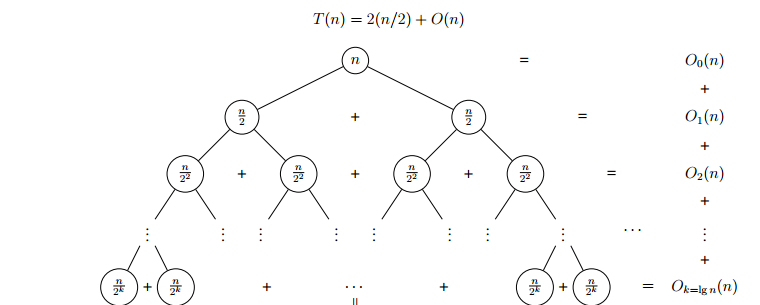

Aqui se puede ver un ejemplo de como aumenta la cantidad de comparaciones dependiendo del número de datos:                    
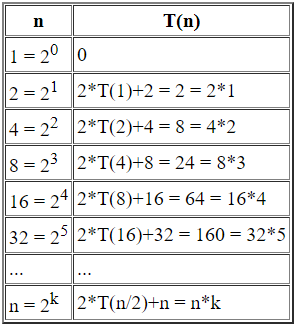

El algoritmo al estar constantemente dividiendo para luego juntar todo nos deja claro que su complejidad temporal es de $O(n log n)$.

# 4. Correctitud
## Teorema (Correctitud).
El algoritmo Merge retorna una sola lista con los mismos elementos de las 2 listas de entrada, pero ordenados de menor a mayor. Los elementos en las listas de entradas ya están en orden.

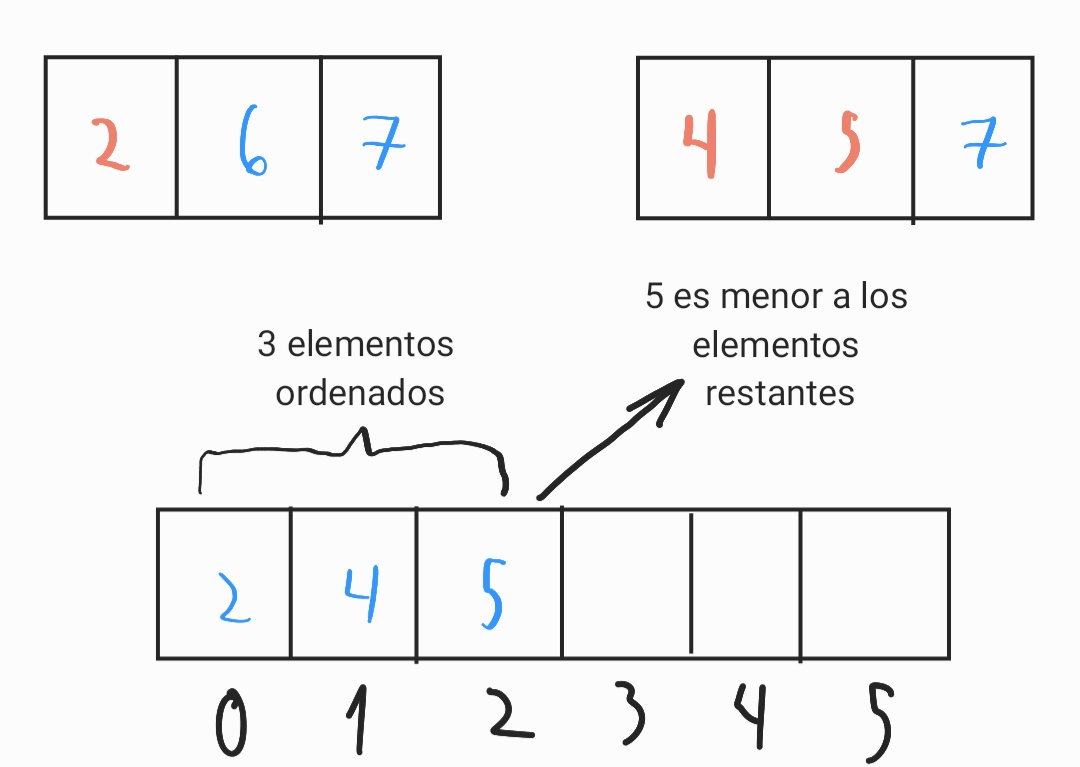

## Prueba del teorema
En cada iteración de Merge se comparan los elementos de cada lista, y se mueve el menor a una lista nueva que va a contener los elementos ordenados. Teniendo esto en cuenta, se puede probar la siguiente propiedad invariante:

> Al comienzo de cada iteración *i* hay *i* elementos ordenados en la lista de salida *a*. Y los elementos que quedan en las listas de entrada son mayores al elemento en *i - 1*.

## Inicialización
Al comienzo de la primera iteración, donde *i* = 1, hay un sólo elemento en la lista *a*. Este elemento es el mínimo de ambas listas, por lo tanto, se cumple la propiedad.


## Mantención
Aplicando inducción, asumimos que al comienzo de cada iteración se cumple la propiedad.

Durante la iteración, se compara el primer elemento de ambas listas de entradas y se mueve el menor a la lista de salida.

Después de la iteración, el elemento menor queda en la posición *i - 1* y se sigue cumpliendo la propiedad invariable.


## Correctitud de Merge Sort

Probaremos la correctitud de Merge Sort utilizando inducción matemática. Nuestra hipótesis *P(n)* es que Merge Sort retorna la lista de entrada pero en orden de menor a mayor.

En el caso base, cuando *n = 1*, Merge Sort retorna la lista con un sólo elemento. Por lo tanto, se cumple la hipótesis, puesto que la lista ya está ordenada.

Para el paso inductivo probaremos *P(m)*. Si Merge Sort se llama en una lista de largo *n*, también se van a llamar 2 recursivamente de largo *m* = n/2. Por inducción, esas llamadas van a ordenar la lista correctamente. Luego, las listas se juntan usando Merge. Según el teorema, Merge retorna una lista ordenada con los mismos elementos de las listas de entradas, por lo tanto, Merge Sort es correcto.

#5. Experimentos

Ahora realizaremos un numero de experimentos que nos ayudaran a visualizar la eficacia del insertion sort en ciertos aspectos.

##5.1. Numero de comparaciones

En este experimento se comprobara el numero de comparaciones que el **merge sort** necesita realizar para poder ordenar una lista en su totailidad.

Para ello se hizo una grafica en la que se muestra.

* La cantidad de comparaciones del caso base calculadas matemáticamente.
* La cantidad de comparaciones realizadas experimentalmente para entradas aleatorias.

Para un problema que tiene un tamaño $n \in [5,20]$


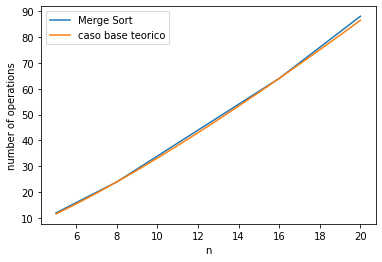

In [6]:
import math
import matplotlib.pyplot as plt

x=[n for n in range(5,21)] 
y1=[n*math.log2(n) for n in range(5,21)] # mejor caso
y=[]; 

for n in range(5,21):
  a = random.sample(range(1, 100), n)
  a,counter = Merge_Sort(a)
  y.append(counter)

plt.plot(x,y)
plt.plot(x,y1)
plt.legend(["Merge Sort", "caso base teorico"])

plt.xlabel('n')
plt.ylabel('number of operations')
plt.show()

###analisis

Como se puede ver la funcion merge sort replica la cantidad de comparaciones del caso base, esto ocurre ya que tanto como para el peor como para el mejor caso, la cantidad de comparaciones necesarias es $n*log(n)$ asi que el **MergeSort** en cualquier caso hace $n*log(n)$

##5.2. Numero de comparaciones

En este experimento se comparara el numero de comparaciones que realiza el **merge sort** a los otros dos metodos anteriormente vistos: el insertcion sort y el bubble sort

Para ello se hizo una grafica en la que se muestra.

* La cantidad de comparaciones que el bubble sort realiza (la grafica azul)
* La cantidad de comparaciones que el insertion sort realiza (la grafica naranja).
* La cantidad de comparaciones que realiza el merge sort (la grafica verde)

para un problema que tiene un tamaño $n \in [5,50]$

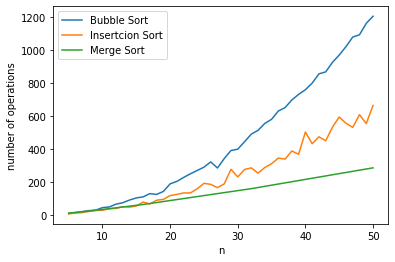

In [5]:
import matplotlib.pyplot as plt

x=[n for n in range(5,51)] 
y=[n for n in range(5,51)]
y1=[]; 
y2=[];
y3=[];

for n in range(5,51):
  a = random.sample(range(1, 100), n)
  a,counter = bubble_sort(a)
  y1.append(counter)

for n in range(5,51):
  a = random.sample(range(1, 100), n)
  a,counter = insertion_sort(a,False)
  y2.append(counter)

for n in range(5,51):
  a = random.sample(range(1, 100), n)
  a,counter = Merge_Sort(a)
  y3.append(counter)

plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)
plt.legend(["Bubble Sort", "Insertcion Sort", "Merge Sort"])

plt.xlabel('n')
plt.ylabel('number of operations')
plt.show()

###analisis

Como se puede ver el **MergeSort** realiza en general menos comparaciones que el **insertion sort** y el **bubble sort**. Y a parte de realizar menos tambien se mantiene mucho mas estable a lo largo de sus ejecuciones.

##5.3. Tiempo de ejecución experimental

En el siguiente experimento se comprueba si el **merge sort** cumple con el tiempo promedio esperado, que sería un tiempo $O(n log(n))$.

Tambien estaremos comparando el tiempo del **merge sort** al tiempo del **insertion sort** y el **bubble sort** ambos con un tiempo $O(n^2)$.

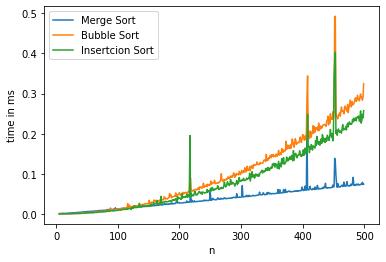

In [4]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
import random

x=[]; y=[]
x1=[]; y1=[]
x2=[]; y2=[]

for n in range(5,500):

  a = random.sample(range(1, 1000), n)

  #la función repeat está ejecutando 20 veces cada algoritmo con el arreglo a y retorna el mejor tiepo obtenido para cada uno.
  t = repeat(setup="from __main__ import Merge_Sort", stmt=f"Merge_Sort({a},{False})", repeat=1, number=10)

  x.append(n)
  y.append(t)

  t = repeat(setup="from __main__ import bubble_sort", stmt=f"bubble_sort({a})", repeat=1, number=10)

  x1.append(n)
  y1.append(t)

  t = repeat(setup="from __main__ import insertion_sort", stmt=f"insertion_sort({a},{False})", repeat=1, number=10)

  x2.append(n)
  y2.append(t)


plt.plot(x,y)
plt.plot(x1,y1)
plt.plot(x2,y2)
plt.legend(["Merge Sort", "Bubble Sort", "Insertcion Sort"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

###Analisis

Aunque no se pueda apreciar con mucha claridad el **MergeSort** en todo su recorrido se mantiene por debajo del **insertion sort** y el **bubble sort** en su tiempo de ejecucion, esto ocurre por lo anteriormente dicho en el punto *5.1.* y es que el **MergeSort** tiene como mejor y peor caso $O(nlog(n))$ asi que este se mantiene constante en el tiempo.

# Anexos

## 1. Codigos para las presentaciones graficas

A continuacion puede ver los codigos de los algoritmos **bubble sort** y **insertion sort** los cuales son necesarios importar para poder hacer la grafica mostrada en el punto 5.2

In [3]:
import random
from termcolor import colored
import copy

def bubble_sort(a, verbose=False):
    n = len(a)
    T = 0 #contador de comparaciones

    if verbose == True: print("input array:",a)

    for i in range(1,n+1):
        if verbose == True: print("\nPasada",i)
        # Flag que indica si el arreglo ya se encuentra ordenado
        already_sorted = True

        # Se recorre el arreglo
        for j in range(n - i):
            T +=1
            if a[j] > a[j + 1]:
                # Si el elemento es mayor al siguiente se intercambia
                a[j], a[j + 1] = a[j + 1], a[j]
                if verbose == True: 
                  print(str(a[:j])[1:-1],",",colored(f"{str(a[j:j+2])[1:-1]}","red"),",",str(a[j+2:])[1:-1])

                already_sorted = False

        if already_sorted == False and verbose == True: 
           print("\nAl finalizar pasada:")
           print(str(a[:n-i])[1:-1],",",colored(f"{str(a[n-i:])[1:-1]}","blue"))

        if already_sorted:
            if verbose == True: print("is sorted!")
            break

    if verbose == True: print("\noutput array:",a)

    return a, T

def insertion_sort(a,verbose):
  n = len(a) ##longitud del arreglo
  aux = 0 ##dato que auxilia al intercambio de datos
  c = 0 ##contador de comparaciones
  
  if(verbose):print("arreglo de entrada: ",a)

  for i in range(0,n): ##ciclo principal que se mueve a travez del arreglo
    k = i
    if(verbose):print("analisis de datos N°",i)
    while k > 0: ##ciclo que empieza a hacer las comparaciones
      if(verbose and k-1 != 0):
          print(str(a[:k-1])[1:-1],",",colored(f"{str(a[k-1:k+1])[1:-1]}","red"),",",str(a[k+1:])[1:-1],"\n")
      elif(verbose and k-1 == 0):
        print(colored(f"{str(a[k-1:k+1])[1:-1]}","red"),",",str(a[k+1:])[1:-1],"\n")
        
      if(a[k] < a[k-1]):
        aux = a[k-1]
        a[k-1] = a[k]
        a[k] = aux
        c = c + 1
        k = k - 1
        if(verbose and k != 0):
          print(str(a[:k])[1:-1],",",colored(f"{str(a[k:k+2])[1:-1]}","green"),",",str(a[k+2:])[1:-1],"\n")
        elif(verbose and k == 0):
          print(colored(f"{str(a[k:k+2])[1:-1]}","green"),",",str(a[k+2:])[1:-1],"\n")
      else: 
        c = c + 1
        break
    
    if(verbose):
      print("lo revisado esta ordenado")
      print(colored(f"{str(a[:i+1])[1:-1]}","blue"),",",str(a[i+1:])[1:-1],"\n")
    if(i == n and verbose):
      print("ya esta completamente ordenado")
    
  return a,c